# iFood CRM Data Analyst Case
Rafael Faria Castelão

---
# Part 2: Features Study

The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled.

The objective of this notebook is to understand the characteristic features of the customers willing to buy the new gadget.

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data
pilot_data = pd.read_csv('ml_project1_data.csv', index_col=0)

# Print information for dataset
print("Dataset contains: \n• {} training examples (rows)\n• {} features (columns)."
      .format(pilot_data.shape[0], pilot_data.shape[1]))

Dataset contains: 
• 2240 training examples (rows)
• 28 features (columns).


In [3]:
# Since data has 28 features let's set an option to display all features
pd.set_option('display.max_columns', 50)

In [6]:
# Print a sample of the data
pilot_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In part 1 (Predictive Model) there was a little bit of exploration on this dataset, where some insights were taken:
- There is a mix of continuous and categorical data. 
- There are some columns, Z_CostContact and Z_Revenue, that have a single value for all rows and are not described in the meta-data table in the case file.
- There are some missing values in Income column.

About the categorical variables and the missing values, since the goal here is not to fit a classification model, let's keep them as they are. But let's drop columns Z_CostContact and Z_Revenue.

In [7]:
# Drop columns Z_CostContact and Z_Revenue
pilot_data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

Simple summary of data:

In [8]:
# Print a summary of the data
pilot_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now let's split data into two sets: one with all customers that bought the new gadget and another one with customers who did not do it.

In [129]:
# Split data into two datasets: 
#  - Positive targets (customers who bought the new gadget)
#  - Negative targets (customers who did not buy the new gadget)
pos_data = pilot_data[pilot_data['Response'] == 1].copy()
neg_data = pilot_data[pilot_data['Response'] == 0].copy()

## Data Analysis
Just to give us a high level idea of what is happening to data, let's check the statiscal summary of both positive and negative sets.

In [130]:
pos_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,334.000000,333.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0
mean,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982,1.0
std,12.398192,23194.080987,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,46.327903,57.507501,2.109924,2.558784,3.131817,3.081931,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.094489,0.0
min,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1959.000000,39763.000000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,3.000000,20.000000,1.000000,3.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1971.000000,64090.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,20.000000,39.500000,1.000000,5.000000,4.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1979.000000,80589.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,57.000000,84.750000,3.000000,7.000000,6.000000,8.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,198.000000,245.000000,11.000000,11.000000,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [131]:
neg_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,1906.000000,1883.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.0
mean,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444,0.0
std,11.910143,25252.804747,0.544975,0.545670,28.519092,305.159188,38.191763,205.299936,52.870253,40.001067,50.576032,1.899981,2.780245,2.799722,3.277521,2.401348,0.207623,0.228214,0.189425,0.181541,0.072262,0.096745,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1959.000000,34421.000000,0.000000,0.000000,27.000000,21.250000,1.000000,14.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1970.000000,50150.000000,0.000000,1.000000,52.000000,152.000000,7.000000,56.000000,11.000000,7.000000,21.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1977.000000,66308.000000,1.000000,1.000000,77.000000,443.750000,28.000000,192.750000,43.000000,30.000000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


The first thing I noticed in the summaries above is that some variables look really different between customers who bought the item (accepted the offer), and customers who did not.

The variable **Income** is one of these. For the customers who accepted the offer, the income seems to be higher than for those one who did not. The average for positive customers is higher than for negative, and standard deviation is not that different. It is also possible to see that there might be an outlier for the negative customers, since the maximum value is way higher than the third quartile.

To understand a little bit more about **Income**, let's explore this variable a little more.

In [132]:
import matplotlib.pyplot as plt

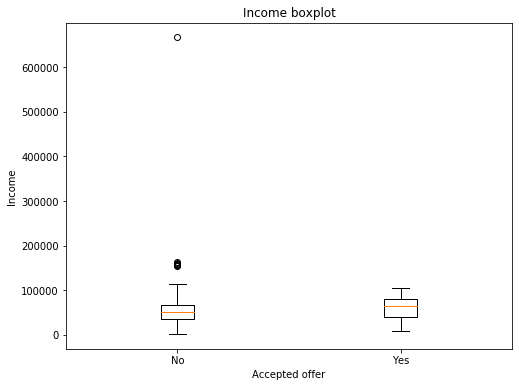

In [151]:
# Plot a boxplot for income values of positive and negative customers
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_data['Income'].dropna(), pos_data['Income'].dropna()], labels=['No', 'Yes'])
ax.set_ylabel("Income")
ax.set_xlabel("Accepted offer")
ax.set_title("Income boxplot")

plt.show()

It's very clear in the boxplot above that there are some outliers in data. Let's deal with this outliers using the interquantile method.

In [154]:
# Drop the missing values
pos_income = pos_data['Income'].dropna()
neg_income = neg_data['Income'].dropna()

# Define interquantile ranges
iqr_pos_income = pos_data['Income'].dropna().quantile(0.75) - pos_data['Income'].dropna().quantile(0.25)
iqr_neg_income = neg_data['Income'].dropna().quantile(0.75) - neg_data['Income'].dropna().quantile(0.25)

# Remove outliers
pos_income = pos_income[(pos_income > pos_income.quantile(0.25) -  1.5*iqr_pos_income) & 
                        (pos_income < pos_income.quantile(0.75) +  1.5*iqr_pos_income)]

neg_income = neg_income[(neg_income > neg_income.quantile(0.25) -  1.5*iqr_neg_income) & 
                        (neg_income < neg_income.quantile(0.75) +  1.5*iqr_neg_income)]

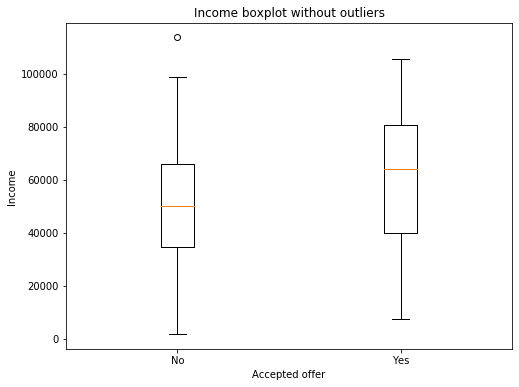

In [156]:
# Plot a boxplot for income values of positive and negative customers without outliers
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_income, pos_income], labels=['No', 'Yes'])
ax.set_ylabel("Income")
ax.set_xlabel("Accepted offer")
ax.set_title("Income boxplot without outliers")

plt.show()

The boxplot above confirms that the average income for customer who accepted the offer is higher than customers who did not.

Just to have a different view of the distributions, let's plot the histograms.

In [164]:
def best_fit_line(mu, sigma, bins):
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    
    return y

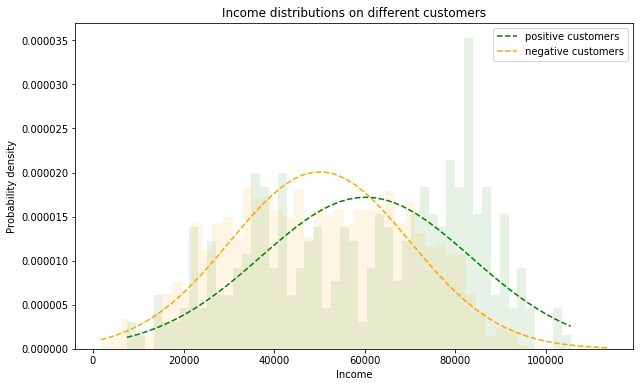

In [183]:
# Plot the distributions of income for both customer groups
fig, ax = plt.subplots(figsize=(10,6))

# Income distribution for positive customers
n, bins, patches = ax.hist(pos_income, 50, density=True, alpha=0.1, color='green')

y = best_fit_line(pos_income.mean(), pos_income.std(), bins)
ax.plot(bins, y, '--', color='green', label='positive customers')

# Income distribution for negative customers
n, bins, patches = ax.hist(neg_income, 50, density=True, alpha=0.1, color='orange')

y = best_fit_line(neg_income.mean(), neg_income.std(), bins)
ax.plot(bins, y, '--', color='orange', label='negative customers')
ax.set_xlabel('Income')
ax.set_ylabel('Probability density')

ax.legend()
ax.set_title('Income distributions on different customers')

plt.show()

There is a clearer view in the graph above that both distributions are actually different. The distribution for the positive customers (customers that bought the new gadget) is shifted to the right in relation to the distribution for the negative customers.

To give a statistical confirmation that these two samples are different, let's use Kolmogorov-Smirnov (KS) test. 

In [184]:
from scipy import stats

In [185]:
stats.ks_2samp(pos_income, neg_income)

Ks_2sampResult(statistic=0.2482114114114114, pvalue=1.1102230246251565e-15)

Since the p-value is lower than the level of significance (I'm using alpha=0.05), these two samples are actually different. This way we can confirm that customers who accepted the offer and bought the new gadget have a higher income than those customer who did not.